In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Installing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
df=pd.read_csv('/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv')
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


* The Human Development Index (HDI) measures each country's social and economic development by focusing on the following four factors: mean years of schooling, expected years of schooling, life expectancy at birth, and gross national income (GNI) per capita.

* In economics, total cost (TC) is the minimum dollar cost of producing some quantity of output.
 
* A Term Deposit (TD), also known as 'fixed deposit' is a deposit that is held at a financial institution for a fixed term. A fixed deposit account allows customers to deposit money for a set period of time, thereby earning a higher rate of interest in return.

* Science, technology and innovation (STI) and culture for sustainable development and the MDGs | Economic and Social Council.
 
* The point of purchase (POP) and the point of sale (POS) are two sides of the same coin; both describe the interaction between a business and a customer in terms of where and how products are purchased. From display shelves to the checkout counter, both POP and POS are essential for a successful business.

* GBPCAP, a financial metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a nation by its population.






In [3]:
df.groupby('COUNTRY')['GDPCAP','POP'].mean().sort_values(ascending=False, by='POP')

# China had the highest point of purchase

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,GDPCAP,POP
COUNTRY,,
China,9.636177,21.087439
India,8.768212,21.045353
United States,10.900906,19.617637
Indonesia,9.322664,19.426899
Pakistan,8.524111,19.213186
...,...,...
Bonaire Sint Eustatius and Saba,0.000000,10.174316
Anguilla,0.000000,9.615939
Montserrat,0.000000,8.516993


In [4]:
df.groupby('COUNTRY')['GDPCAP','POP'].mean().sort_values(ascending=False, by='GDPCAP')


# Qatar had the most high GDP during COVID-19

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,GDPCAP,POP
COUNTRY,,
Qatar,11.669379,14.873669
Luxembourg,11.454003,13.347067
Singapore,11.356685,15.582011
Brunei,11.181769,12.988793
Ireland,11.117440,15.412430
...,...,...
Jersey,0.000000,11.523598
Liechtenstein,0.000000,10.548940
Monaco,0.000000,10.577554


In [3]:
df.shape

(50418, 9)

In [5]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [30]:
len(df['COUNTRY'].unique())

210

In [27]:
df['GDPCAP'].value_counts()

0.000000     5712
7.497754      294
10.109460     294
10.469372     294
10.408265     294
             ... 
7.971401      172
7.254100      171
7.955479      158
10.934087      51
7.698901        4
Name: GDPCAP, Length: 185, dtype: int64

In [36]:
df.groupby('COUNTRY')['HDI'].unique().sort_values(ascending=False)

#Norway has the highest Human Development Index
                           

COUNTRY
Norway         [0.953]
Switzerland    [0.944]
Australia      [0.939]
Ireland        [0.938]
Germany        [0.936]
                ...   
South Sudan    [0.388]
Niger          [0.354]
Isle of Man      [nan]
Liberia        [0.435]
Kosovo           [0.0]
Name: HDI, Length: 210, dtype: object

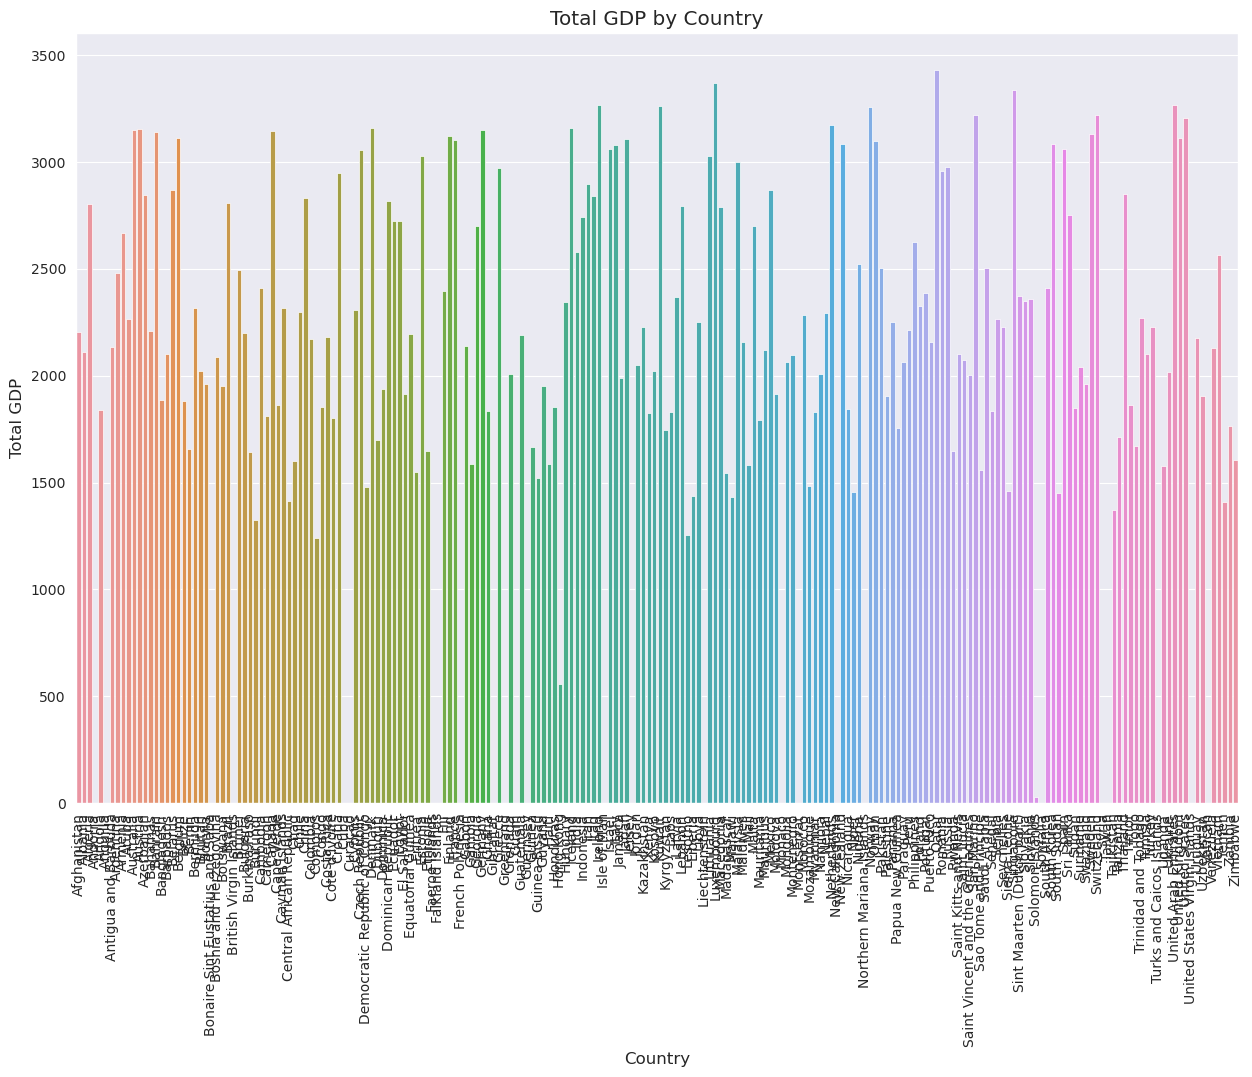

In [57]:
df_by_country = df.groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for each country
plt.figure(figsize=(15, 10))
sns.barplot(x=df_by_country.index, y='GDPCAP', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total GDP by Country')
plt.xlabel('Country')
plt.ylabel('Total GDP')
plt.show()








# Analysis by GDP for top 10 countries

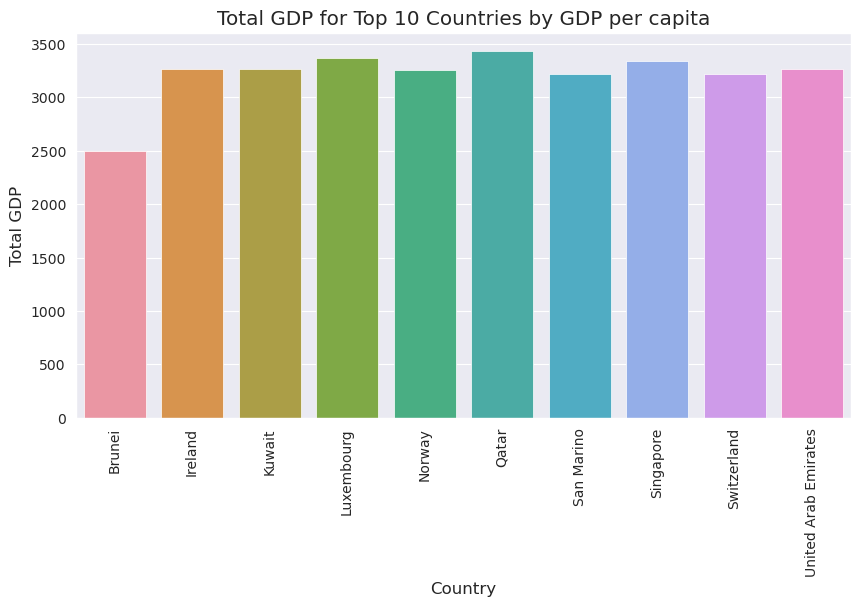

In [56]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='GDPCAP', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='GDPCAP', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total GDP for Top 10 Countries by GDP per capita')
plt.xlabel('Country')
plt.ylabel('Total GDP')
plt.show()








In [54]:
plt.style.use('ggplot')

# Set the ggplot style in seaborn
sns.set_style('darkgrid')


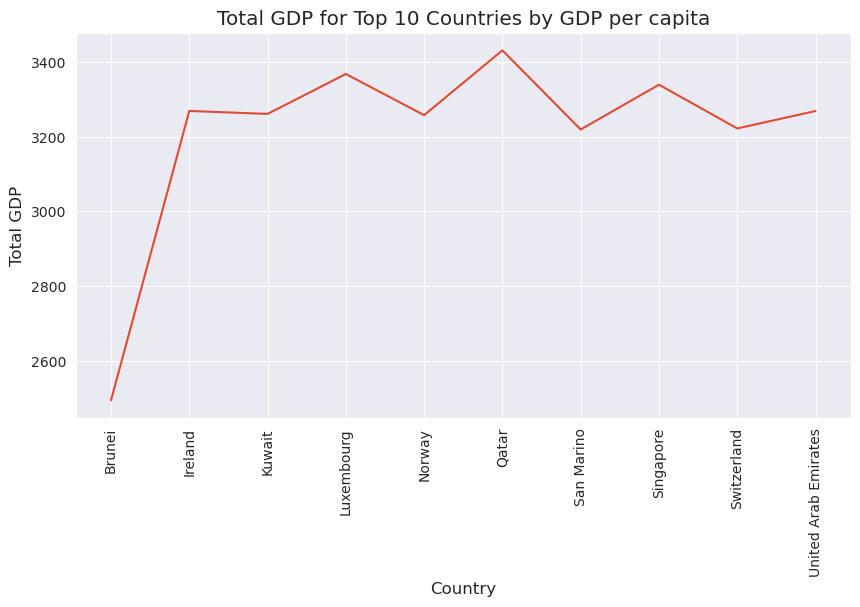

In [55]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_by_country.index, y='GDPCAP', data=df_by_country, markers='+')
plt.xticks(rotation=90)
plt.title('Total GDP for Top 10 Countries by GDP per capita')
plt.xlabel('Country')
plt.ylabel('Total GDP')
plt.show()

In [58]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


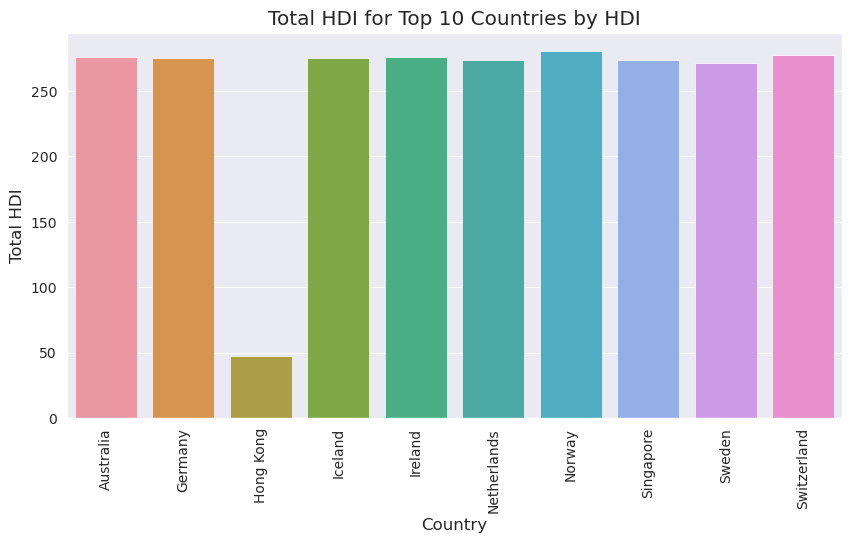

In [63]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='HDI', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='HDI', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total HDI for Top 10 Countries by HDI')
plt.xlabel('Country')
plt.ylabel('Total HDI')
plt.show()

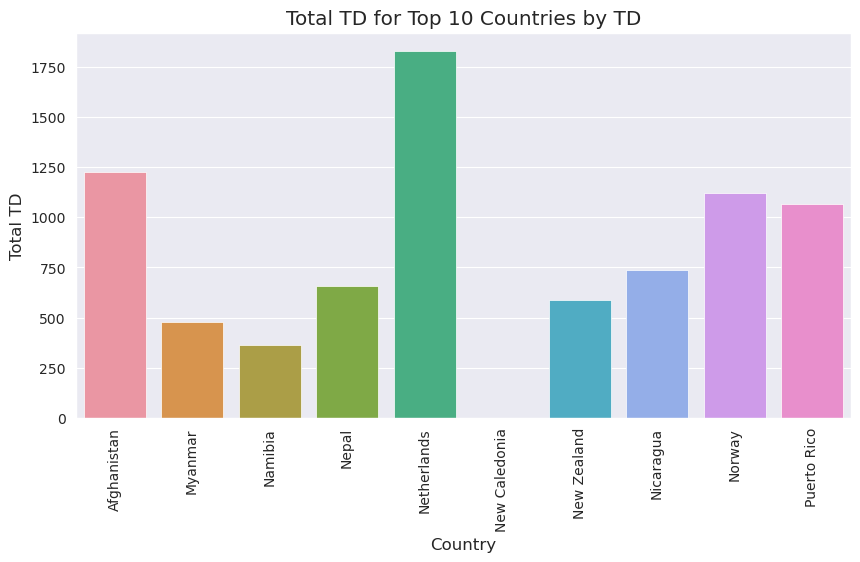

In [64]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='TD', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='TD', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total TD for Top 10 Countries by TD')
plt.xlabel('Country')
plt.ylabel('Total TD')
plt.show()

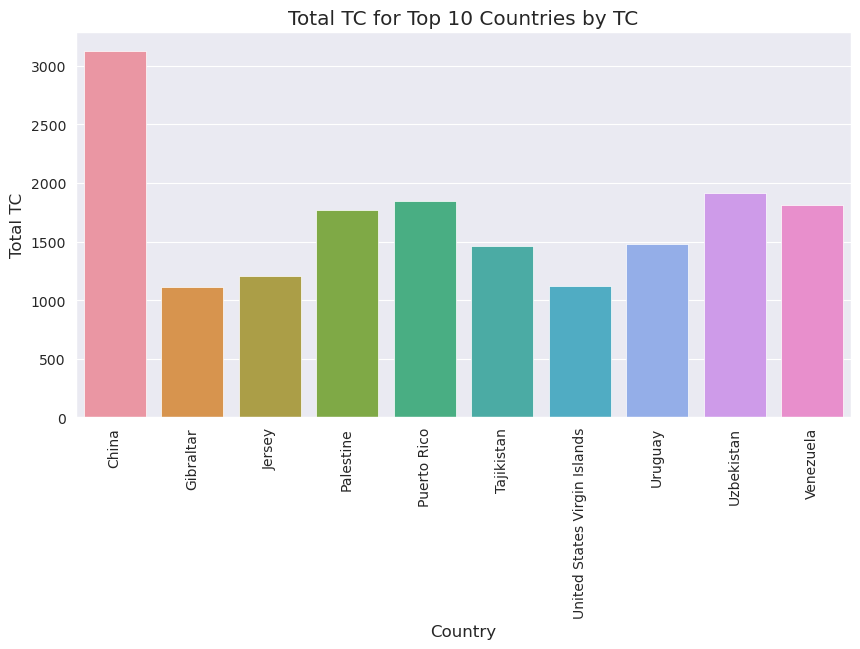

In [66]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='TC', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='TC', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total TC for Top 10 Countries by TC')
plt.xlabel('Country')
plt.ylabel('Total TC')
plt.show()

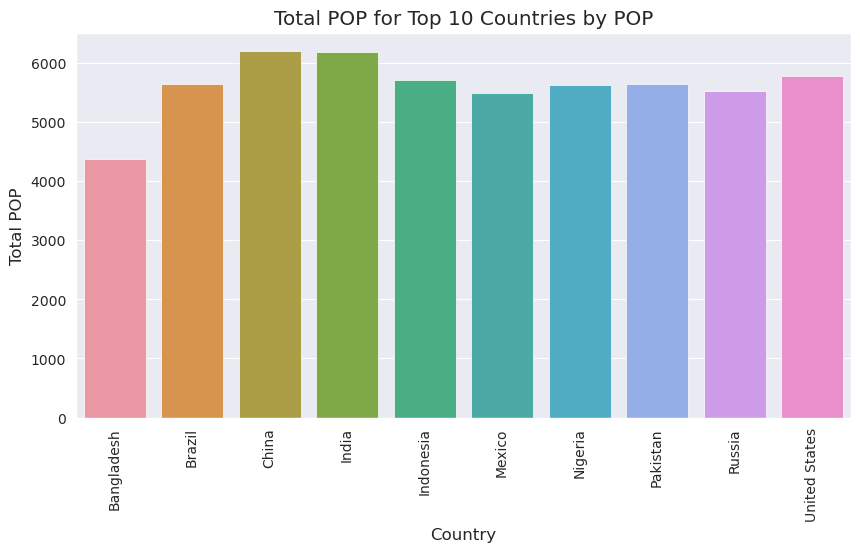

In [67]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='POP', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='POP', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total POP for Top 10 Countries by POP')
plt.xlabel('Country')
plt.ylabel('Total POP')
plt.show()

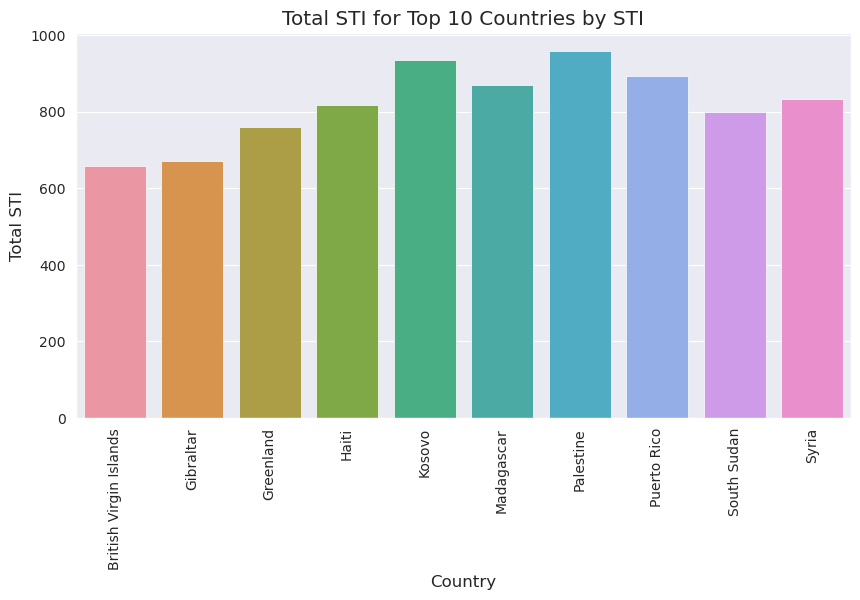

In [68]:
top10_gdp = df.drop_duplicates(subset='COUNTRY').sort_values(by='STI', ascending=False).head(10)

# Group the DataFrame by country and calculate the sum of all columns for the top 10 countries
df_by_country = df[df['COUNTRY'].isin(top10_gdp['COUNTRY'])].groupby('COUNTRY').sum()

# Plot a bar chart of the total GDP for the top 10 countries
plt.figure(figsize=(10, 5))
sns.barplot(x=df_by_country.index, y='STI', data=df_by_country)
plt.xticks(rotation=90)
plt.title('Total STI for Top 10 Countries by STI')
plt.xlabel('Country')
plt.ylabel('Total STI')
plt.show()

In [69]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


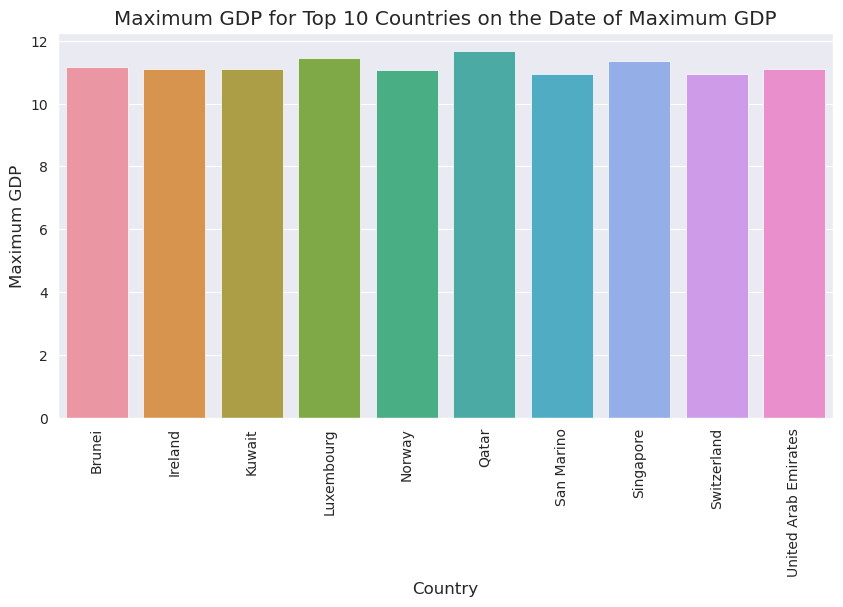

In [76]:
# Find the top 10 countries based on GDP
top10_gdp_countries = df.groupby('COUNTRY')['GDPCAP'].max().sort_values(ascending=False)[:10].index

# Filter the DataFrame to include only the top 10 countries
df_top10 = df[df['COUNTRY'].isin(top10_gdp_countries)]

# Find the date with maximum GDP for each country
max_gdp_date_by_country = df_top10.loc[df_top10.groupby('COUNTRY')['GDPCAP'].idxmax(), ['COUNTRY', 'DATE']]

# Merge with the original DataFrame to get the GDP value on the date of maximum GDP
max_gdp_by_country = pd.merge(max_gdp_date_by_country, df_top10, on=['COUNTRY', 'DATE'], how='left')

# Plot a bar chart of the maximum GDP for each country on the date of maximum GDP
plt.figure(figsize=(10, 5))
sns.barplot(x='COUNTRY', y='GDPCAP', data=max_gdp_by_country)
plt.xticks(rotation=90)
plt.title('Maximum GDP for Top 10 Countries on the Date of Maximum GDP')
plt.xlabel('Country')
plt.ylabel('Maximum GDP')
plt.show()

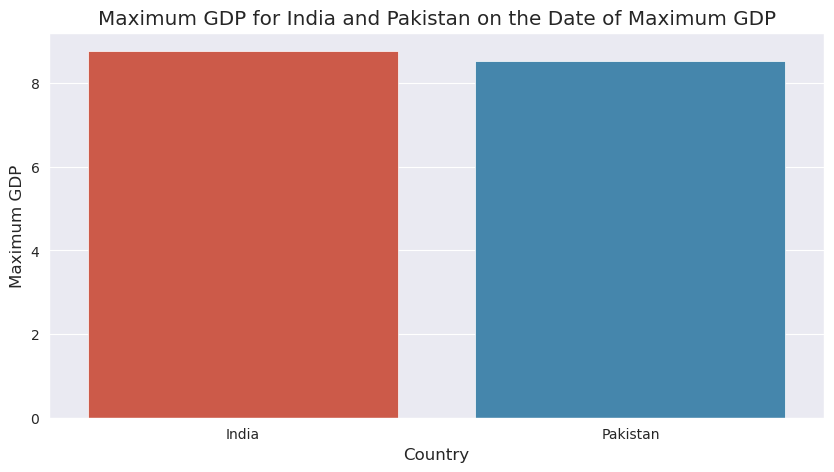

In [77]:
# Filter the DataFrame to include only India and Pakistan
df_ind_pak = df[df['COUNTRY'].isin(['India', 'Pakistan'])]

# Find the date with maximum GDP for each country
max_gdp_date_by_country = df_ind_pak.loc[df_ind_pak.groupby('COUNTRY')['GDPCAP'].idxmax(), ['COUNTRY', 'DATE']]

# Merge with the original DataFrame to get the GDP value on the date of maximum GDP
max_gdp_by_country = pd.merge(max_gdp_date_by_country, df_ind_pak, on=['COUNTRY', 'DATE'], how='left')

# Plot a bar chart of the maximum GDP for each country on the date of maximum GDP
plt.figure(figsize=(10, 5))
sns.barplot(x='COUNTRY', y='GDPCAP', data=max_gdp_by_country)
plt.title('Maximum GDP for India and Pakistan on the Date of Maximum GDP')
plt.xlabel('Country')
plt.ylabel('Maximum GDP')
plt.show()